Data Science Career Track
Capstone: Pre-processing and Training Data Development Rubric

Learning Objectives
Understand the importance of creating a model training development data set.
Correctly identify when to create dummy features or one-hot encoded features.
Understand the importance of magnitude standardization.
Apply the train and test split to the development dataset effectively.


In this notebook, I work at standardizing the data as well as one-hot encoding some of the categorical variables. Also, I'll make my train test split! 

In [130]:
#import packages

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [45]:
#Load the files
df = pd.read_csv('Desktop/GitHub/literary-prizes/eda.csv')
authors = pd.read_csv('Desktop/GitHub/literary-prizes/author_sum.csv')

In [46]:
df.head()

,Unnamed: 0,person_id,full_name,given_name,last_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
0,0,1891.0,Reuben Bercovitch,Reuben,Bercovitch,male,0.0,no mfa,winner,PEN America,Hemingway Award for Debut Novel,1979.0,prose,book,10000.0,NaN,NaN,NaN,1.0
1,1,1807.0,Pauline Hanson,Pauline,Hanson,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972.0,no genre,career,10000.0,NaN,NaN,NaN,1.0
2,2,1033.0,Jean Valentine,Jean,Valentine,female,1.0,no mfa,winner,Yale University,Bollingen Prize for Poetry,2017.0,poetry,career,10000.0,Radcliffe College,NaN,NaN,1.0
3,3,123.0,Andrea Lawlor,Andrea,Lawlor,nonbinary/they,1.0,"University of Massachusetts, Amherst",winner,Whiting Foundation,Whiting Award,2020.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
4,4,1295.0,Kayleb Rae Candrilli,Kayleb Rae,Candrilli,nonbinary/they,1.0,University of Alabama,winner,Whiting Foundation,Whiting Award,2019.0,no genre,career,50000.0,NaN,NaN,NaN,1.0


In [47]:
df.columns

Index(['Unnamed: 0', 'person_id', 'full_name', 'given_name', 'last_name',
       'gender', 'graduate_degree', 'mfa_degree', 'role', 'prize_institution',
       'prize_name', 'prize_year', 'prize_genre', 'prize_type', 'prize_amount',
       'elite_1', 'elite_2', 'elite_3', 'award'],
      dtype='object')

In [59]:
df=df.drop(labels=2776, axis=0)
df=df.drop(labels=['Unnamed: 0', 'given_name', 'last_name'], axis=1)


In [60]:
df=df.drop(labels=[ 'given_name', 'last_name'], axis=1)
df

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_genre,prize_type,prize_amount,elite_1,elite_2,elite_3,award
0,1891.0,Reuben Bercovitch,male,0.0,no mfa,winner,PEN America,Hemingway Award for Debut Novel,1979.0,prose,book,10000.0,NaN,NaN,NaN,1.0
1,1807.0,Pauline Hanson,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972.0,no genre,career,10000.0,NaN,NaN,NaN,1.0
2,1033.0,Jean Valentine,female,1.0,no mfa,winner,Yale University,Bollingen Prize for Poetry,2017.0,poetry,career,10000.0,Radcliffe College,NaN,NaN,1.0
3,123.0,Andrea Lawlor,nonbinary/they,1.0,"University of Massachusetts, Amherst",winner,Whiting Foundation,Whiting Award,2020.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
4,1295.0,Kayleb Rae Candrilli,nonbinary/they,1.0,University of Alabama,winner,Whiting Foundation,Whiting Award,2019.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,2210.0,Tessa Hadley,female,0.0,no mfa,winner,Yale University,Windham Campbell Prize,2016.0,prose,career,165000.0,NaN,NaN,NaN,1.0
2772,2247.0,Timberlake Wertenbaker,female,0.0,no mfa,winner,Whiting Foundation,Whiting Award,1989.0,no genre,career,50000.0,NaN,NaN,NaN,1.0
2773,2253.0,Tina Howe,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1993.0,no genre,career,10000.0,NaN,NaN,NaN,1.0
2774,2399.0,Yannick Murphy,female,0.0,no mfa,winner,Whiting Foundation,Whiting Award,1990.0,no genre,career,50000.0,NaN,NaN,NaN,1.0


In [53]:
#Making sure there's the same number of id's as authors

print(df.person_id.nunique(), df.full_name.nunique())

1772 1772


In [8]:
df.prize_name.value_counts()

Arts and Letters Awards                                       609
Whiting Award                                                 348
Pulitzer Prize                                                196
National Book Award                                           149
Poet Laureate                                                 129
Lannan Award                                                  105
Ruth Lilly And Dorothy Sargent Rosenberg Poetry Fellowship     94
MacArthur Fellowship                                           89
Academy of American Poets Fellowship                           88
USA Fellowship                                                 78
Lannan Fellowship                                              72
Rosenthal Family Foundation Award                              64
Bollingen Prize for Poetry                                     52
Lenore Marshall Poetry Prize                                   46
Hemingway Award for Debut Novel                                45
Harold D. 

In [43]:
len(df.prize_name.value_counts())

51

In [38]:
names = np.array(df.prize_name)

In [41]:
names_array = np.unique(names)

In [17]:
prize_name_by_school = df[['prize_name', 'mfa_degree']].groupby(['prize_name']).value_counts()

In [21]:
prize_name_by_school

prize_name                            mfa_degree                          
Academy of American Poets Fellowship  University of Iowa                      5
                                      Columbia University                     3
                                      Bowling Green State University          1
                                      University of Massachusetts, Amherst    1
                                      Indiana University                      1
                                                                             ..
Whiting Award                         North Carolina State University         1
Windham Campbell Prize                University of Iowa                      2
                                      New York University                     2
                                      SUNY Brookport                          1
                                      Bowling Green State University          1
Length: 395, dtype: int64

In [51]:
prize_name_by_school['Windham Campbell Prize'].index

Index(['University of Iowa', 'New York University', 'SUNY Brookport',
       'Bowling Green State University'],
      dtype='object', name='mfa_degree')

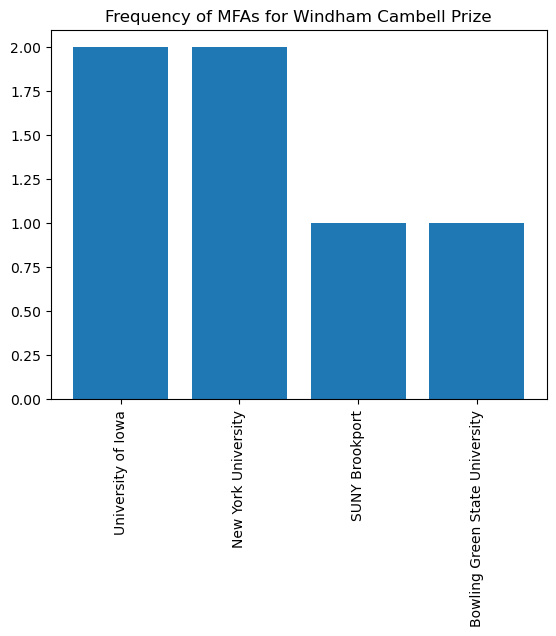

In [56]:
plt.bar(x=prize_name_by_school['Windham Campbell Prize'].index, height=prize_name_by_school['Windham Campbell Prize'])
plt.xticks(rotation=90)
plt.title('Frequency of MFAs for Windham Cambell Prize')
plt.show()

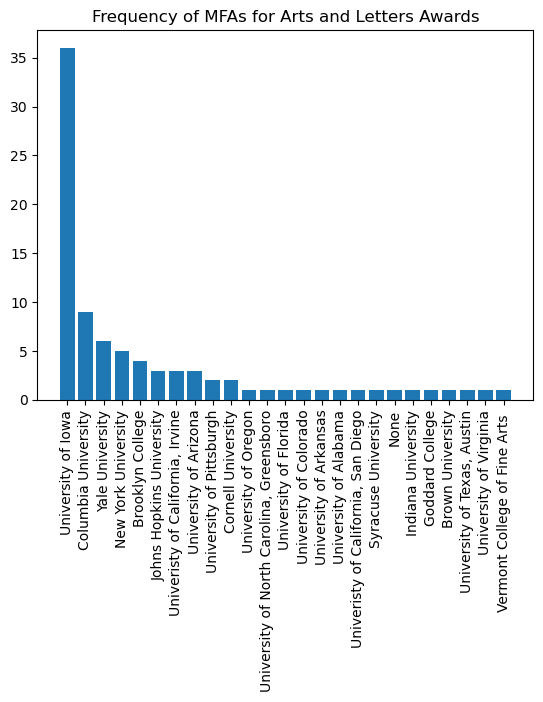

In [57]:
plt.bar(x=prize_name_by_school['Arts and Letters Awards'].index, height=prize_name_by_school['Arts and Letters Awards'])
plt.xticks(rotation=90)
plt.title('Frequency of MFAs for Arts and Letters Awards')
plt.show()

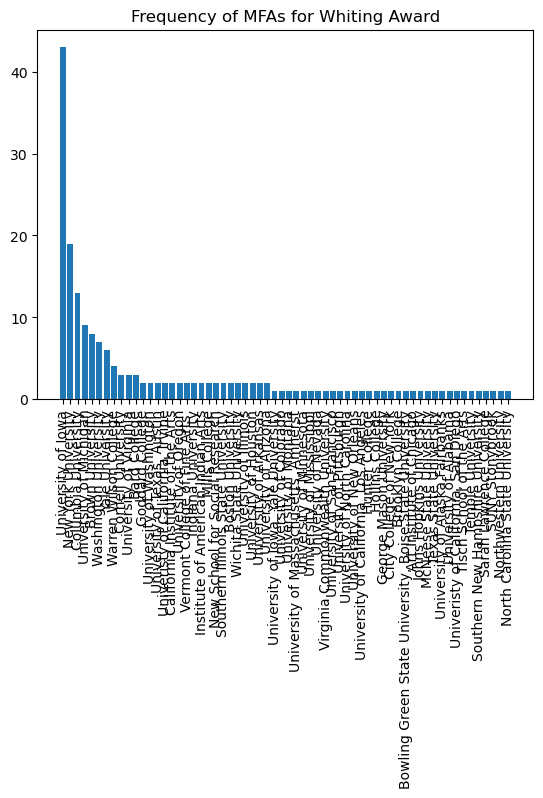

In [60]:

plt.bar(x=prize_name_by_school['Whiting Award'].index, height=prize_name_by_school['Whiting Award'])
plt.xticks(rotation=90)
plt.title('Frequency of MFAs for Whiting Award')
plt.show()

In [56]:
authors=authors.drop(labels='Unnamed: 0', axis=1)
authors

,person_id,full_name,gender,graduate_degree,mfa_degree,award,prize_amount
0,1.0,A. B. Guthrie Jr,male,0,no mfa,1.0,15000.0
1,2.0,A. E. Stallings,female,1,no mfa,3.0,570000.0
2,3.0,A. G. Mojtabai,female,1,no mfa,2.0,20000.0
3,4.0,A. J. Verdelle,female,1,Bard College,2.0,70000.0
4,6.0,A. R. Ammons,male,1,no mfa,9.0,900000.0
...,...,...,...,...,...,...,...
1767,2405.0,Yxta Maya Murray,female,1,no mfa,1.0,50000.0
1768,2406.0,Z. Z. Packer,female,1,University of Iowa,1.0,50000.0
1769,2407.0,Zachary Lazar,male,1,University of Iowa,1.0,20000.0
1770,2409.0,Zarina Mullan Plath,female,0,no mfa,1.0,15000.0


Wait! I just realized, there's nothing about elite colleges in this data set! 

Also, so that I preserve some of the other information, I'm going to make some new features using one-hot encoding!

In [65]:
df=pd.get_dummies(df,columns=['prize_type'], prefix='PT')

In [66]:
df=pd.get_dummies(df,columns=['prize_genre'], prefix='PG')

In [67]:
df

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,PT_book,PT_career,PG_no genre,PG_poetry,PG_prose
0,1891.0,Reuben Bercovitch,male,0.0,no mfa,winner,PEN America,Hemingway Award for Debut Novel,1979.0,10000.0,NaN,NaN,NaN,1.0,1,0,0,0,1
1,1807.0,Pauline Hanson,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972.0,10000.0,NaN,NaN,NaN,1.0,0,1,1,0,0
2,1033.0,Jean Valentine,female,1.0,no mfa,winner,Yale University,Bollingen Prize for Poetry,2017.0,10000.0,Radcliffe College,NaN,NaN,1.0,0,1,0,1,0
3,123.0,Andrea Lawlor,nonbinary/they,1.0,"University of Massachusetts, Amherst",winner,Whiting Foundation,Whiting Award,2020.0,50000.0,NaN,NaN,NaN,1.0,0,1,1,0,0
4,1295.0,Kayleb Rae Candrilli,nonbinary/they,1.0,University of Alabama,winner,Whiting Foundation,Whiting Award,2019.0,50000.0,NaN,NaN,NaN,1.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,2210.0,Tessa Hadley,female,0.0,no mfa,winner,Yale University,Windham Campbell Prize,2016.0,165000.0,NaN,NaN,NaN,1.0,0,1,0,0,1
2772,2247.0,Timberlake Wertenbaker,female,0.0,no mfa,winner,Whiting Foundation,Whiting Award,1989.0,50000.0,NaN,NaN,NaN,1.0,0,1,1,0,0
2773,2253.0,Tina Howe,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1993.0,10000.0,NaN,NaN,NaN,1.0,0,1,1,0,0
2774,2399.0,Yannick Murphy,female,0.0,no mfa,winner,Whiting Foundation,Whiting Award,1990.0,50000.0,NaN,NaN,NaN,1.0,0,1,1,0,0


In [79]:
a = df.groupby(['person_id', 
                'full_name', 
                'gender', 
                'graduate_degree', 
                'mfa_degree', 
                'elite_1', 'elite_2', 'elite_3'
               ]
              ).agg({'award': 'sum', 
                     'prize_amount': 'sum', 
                     'PT_book': 'sum', 
                     'PT_career': 'sum',
                     'PG_poetry': 'sum', 
                     'PG_prose': 'sum'}).reset_index()

In [83]:
a

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
0,32.0,Akhil Sharma,male,1.0,no mfa,Princeton University,Stanford University,Harvard University,2.0,60000.0,1,1,0,1
1,1317.0,Kevin Young,male,1.0,Brown University,Harvard University,Brown University,Stanford University,2.0,75000.0,1,1,1,0
2,1758.0,Ottessa Moshfegh,female,1.0,Brown University,Barnard College,Brown University,Stanford University,1.0,10000.0,1,0,0,1
3,1912.0,Richard Price,male,1.0,Columbia University,Cornell University,Columbia University,Stanford University,1.0,10000.0,0,1,0,0
4,2276.0,Tracy Smith,female,1.0,Columbia University,Harvard University,Columbia University,Stanford University,6.0,195000.0,1,5,5,0
5,2279.0,Trudy Dittmar,female,1.0,Columbia University,University of Pennsylvania,University of Chicago,Columbia University,1.0,50000.0,0,1,0,0


This is only giving me 6 people. I have to add none, to elite_1, 2, 3!

In [86]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   person_id          2776 non-null   float64
 1   full_name          2776 non-null   object 
 2   gender             2776 non-null   object 
 3   graduate_degree    2776 non-null   float64
 4   mfa_degree         2776 non-null   object 
 5   role               2776 non-null   object 
 6   prize_institution  2776 non-null   object 
 7   prize_name         2776 non-null   object 
 8   prize_year         2776 non-null   float64
 9   prize_amount       2776 non-null   float64
 10  elite_1            1096 non-null   object 
 11  elite_2            137 non-null    object 
 12  elite_3            13 non-null     object 
 13  award              2776 non-null   float64
 14  PT_book            2776 non-null   uint8  
 15  PT_career          2776 non-null   uint8  
 16  PG_no genre        2776 

In [90]:
df.elite_1.fillna('None', inplace=True)
df.elite_2.fillna('None', inplace=True)
df.elite_3.fillna('None', inplace=True)

In [92]:
df

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,PT_book,PT_career,PG_no genre,PG_poetry,PG_prose
0,1891.0,Reuben Bercovitch,male,0.0,no mfa,winner,PEN America,Hemingway Award for Debut Novel,1979.0,10000.0,None,None,None,1.0,1,0,0,0,1
1,1807.0,Pauline Hanson,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1972.0,10000.0,None,None,None,1.0,0,1,1,0,0
2,1033.0,Jean Valentine,female,1.0,no mfa,winner,Yale University,Bollingen Prize for Poetry,2017.0,10000.0,Radcliffe College,None,None,1.0,0,1,0,1,0
3,123.0,Andrea Lawlor,nonbinary/they,1.0,"University of Massachusetts, Amherst",winner,Whiting Foundation,Whiting Award,2020.0,50000.0,None,None,None,1.0,0,1,1,0,0
4,1295.0,Kayleb Rae Candrilli,nonbinary/they,1.0,University of Alabama,winner,Whiting Foundation,Whiting Award,2019.0,50000.0,None,None,None,1.0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,2210.0,Tessa Hadley,female,0.0,no mfa,winner,Yale University,Windham Campbell Prize,2016.0,165000.0,None,None,None,1.0,0,1,0,0,1
2772,2247.0,Timberlake Wertenbaker,female,0.0,no mfa,winner,Whiting Foundation,Whiting Award,1989.0,50000.0,None,None,None,1.0,0,1,1,0,0
2773,2253.0,Tina Howe,female,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1993.0,10000.0,None,None,None,1.0,0,1,1,0,0
2774,2399.0,Yannick Murphy,female,0.0,no mfa,winner,Whiting Foundation,Whiting Award,1990.0,50000.0,None,None,None,1.0,0,1,1,0,0


In [93]:
#Let's try this again
a = df.groupby(['person_id', 
                'full_name', 
                'gender', 
                'graduate_degree', 
                'mfa_degree', 
                'elite_1', 'elite_2', 'elite_3'
               ]
              ).agg({'award': 'sum', 
                     'prize_amount': 'sum', 
                     'PT_book': 'sum', 
                     'PT_career': 'sum',
                     'PG_poetry': 'sum', 
                     'PG_prose': 'sum'}).reset_index()

In [94]:
a

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
0,1.0,A. B. Guthrie Jr,male,0.0,no mfa,None,None,None,1.0,15000.0,1,0,0,1
1,2.0,A. E. Stallings,female,1.0,no mfa,None,None,None,3.0,570000.0,0,3,0,0
2,3.0,A. G. Mojtabai,female,1.0,no mfa,Columbia University,None,None,2.0,20000.0,1,1,0,1
3,4.0,A. J. Verdelle,female,1.0,Bard College,University of Chicago,None,None,2.0,70000.0,0,2,0,1
4,6.0,A. R. Ammons,male,1.0,no mfa,None,None,None,9.0,900000.0,2,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,2405.0,Yxta Maya Murray,female,1.0,no mfa,None,None,None,1.0,50000.0,0,1,0,0
1771,2406.0,Z. Z. Packer,female,1.0,University of Iowa,Yale University,Stanford University,None,1.0,50000.0,0,1,0,0
1772,2407.0,Zachary Lazar,male,1.0,University of Iowa,Brown University,None,None,1.0,20000.0,0,1,0,0
1773,2409.0,Zarina Mullan Plath,female,0.0,no mfa,None,None,None,1.0,15000.0,0,1,1,0


In [98]:
#I shouldn't have 1775 rows though. I need to find duplicates.

a[a.full_name.duplicated()]

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
219,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,1.0,625000.0,0,1,0,0
1368,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,None,None,1.0,10000.0,0,1,0,0
1738,2362.0,William Gaddis,male,0.0,no mfa,None,None,None,1.0,10000.0,1,0,0,1


In [102]:
#Okay, let's try this again

a.loc[a['full_name']=='Campbell McGrath'] 

#I thought I took care of him before...is there a typo? 

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
218,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,2.0,150000.0,1,1,1,0
219,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,1.0,625000.0,0,1,0,0


In [103]:
#Checks out here
a.loc[a['mfa_degree']=='Columbia University'] 

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
189,274.0,Brenda Shaughnessy,female,1.0,Columbia University,Columbia University,None,None,1.0,10000.0,0,1,0,0
218,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,2.0,150000.0,1,1,1,0
219,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,1.0,625000.0,0,1,0,0
232,326.0,Carolyn Cooke,female,1.0,Columbia University,Columbia University,None,None,1.0,25000.0,1,0,0,1
239,335.0,Catherine Bowman,female,1.0,Columbia University,Columbia University,None,None,1.0,10000.0,1,0,1,0
240,336.0,Catherine Lacey,female,1.0,Columbia University,Columbia University,None,None,1.0,50000.0,0,1,0,0
264,367.0,Charlotte Bacon,female,1.0,Columbia University,Harvard University,Columbia University,None,1.0,10000.0,1,0,0,1
297,410.0,Clarence Coo,male,1.0,Columbia University,Columbia University,None,None,1.0,50000.0,0,1,0,0
301,415.0,Claudia Rankine,female,1.0,Columbia University,Columbia University,None,None,7.0,945000.0,0,7,5,0
325,446.0,Cyree Jarelle Johnson,male,1.0,Columbia University,Columbia University,None,None,1.0,25800.0,0,1,1,0


In [104]:
#Okay, he's here too
a.loc[a['elite_1']=='University of Chicago'] 

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
3,4.0,A. J. Verdelle,female,1.0,Bard College,University of Chicago,None,None,2.0,70000.0,0,2,0,1
11,18.0,Adria Bernardi,female,1.0,no mfa,University of Chicago,None,None,1.0,15000.0,1,0,0,1
170,243.0,Bette Howland,female,0.0,no mfa,University of Chicago,None,None,1.0,500000.0,0,1,0,0
218,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,2.0,150000.0,1,1,1,0
219,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,1.0,625000.0,0,1,0,0
226,317.0,Carol Brightman,female,1.0,no mfa,University of Chicago,None,None,1.0,10000.0,0,1,0,0
363,493.0,Daryl Hine,male,1.0,no mfa,University of Chicago,None,None,2.0,510000.0,0,2,0,0
498,666.0,Elizabeth Arnold,female,1.0,no mfa,University of Chicago,None,None,1.0,50000.0,0,1,0,0
585,800.0,George Dillon,male,0.0,no mfa,University of Chicago,None,None,1.0,15000.0,1,0,1,0
637,869.0,Hayden Carruth,male,1.0,no mfa,University of Chicago,None,None,6.0,355000.0,2,4,5,0


In [106]:
#I found it! Columbia has a space in front of it WOMP WOMP

a.loc[a['elite_2']==' Columbia University'] 

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
127,185.0,Ariana Reines,female,1.0,no mfa,Barnard College,Columbia University,None,1.0,100000.0,1,0,0,1
144,206.0,Ayad Akhtar,male,1.0,no mfa,Brown University,Columbia University,None,1.0,10000.0,0,1,0,0
218,308.0,Campbell McGrath,male,1.0,Columbia University,University of Chicago,Columbia University,None,2.0,150000.0,1,1,1,0
264,367.0,Charlotte Bacon,female,1.0,Columbia University,Harvard University,Columbia University,None,1.0,10000.0,1,0,0,1
407,552.0,Davidr Slavitt,male,1.0,no mfa,Yale University,Columbia University,None,1.0,10000.0,0,1,0,0
542,730.0,F. D. Reeve,male,1.0,no mfa,Princeton University,Columbia University,None,1.0,10000.0,0,1,0,0
613,837.0,Gregory Rabassa,male,1.0,no mfa,Dartmouth College,Columbia University,None,1.0,10000.0,0,1,0,0
639,871.0,Heidi Durrow,female,1.0,no mfa,Stanford University,Columbia University,None,1.0,25000.0,1,0,0,1
803,1082.0,Joan Kane,female,1.0,Columbia University,Harvard University,Columbia University,None,1.0,50000.0,0,1,0,0
817,1102.0,John Ashberry,male,1.0,no mfa,Harvard University,Columbia University,None,2.0,40000.0,1,1,2,0


In [107]:
df.loc[df['full_name']=='Campbell McGrath']

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,PT_book,PT_career,PG_no genre,PG_poetry,PG_prose
192,308.0,Campbell McGrath,male,1.0,Columbia University,winner,Claremont Graduate University,Kingsley Tufts Poetry Award,1997.0,100000.0,University of Chicago,Columbia University,None,1.0,1,0,0,1,0
776,308.0,Campbell McGrath,male,1.0,Columbia University,winner,"United States Artists (Ford, Rockefeller, Rasm...",USA Fellowship,2011.0,50000.0,University of Chicago,Columbia University,None,1.0,0,1,1,0,0
1527,308.0,Campbell McGrath,male,1.0,Columbia University,winner,MacArthur Foundation,MacArthur Fellowship,1999.0,625000.0,University of Chicago,Columbia University,None,1.0,0,1,1,0,0


In [108]:
df.loc[1527, 'elite_2'] = ' Columbia University'

In [109]:
a.loc[a['full_name']== 'Rachel Hadas']

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
1367,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,1,0
1368,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,None,None,1.0,10000.0,0,1,0,0


In [110]:
df.loc[df['full_name']== 'Rachel Hadas']

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,PT_book,PT_career,PG_no genre,PG_poetry,PG_prose
2383,1857.0,Rachel Hadas,female,1.0,no mfa,winner,Folger Shakespeare Library,O. B. Hardison Poetry Prize,2000.0,10000.0,Radcliffe College,Princeton University,None,1.0,0,1,0,1,0
2399,1857.0,Rachel Hadas,female,1.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1990.0,10000.0,Radcliffe College,None,None,1.0,0,1,1,0,0


In [111]:
df.loc[2399, 'elite_2'] ='Princeton University'

In [112]:
df.loc[df['full_name']== 'Rachel Hadas']

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,PT_book,PT_career,PG_no genre,PG_poetry,PG_prose
2383,1857.0,Rachel Hadas,female,1.0,no mfa,winner,Folger Shakespeare Library,O. B. Hardison Poetry Prize,2000.0,10000.0,Radcliffe College,Princeton University,None,1.0,0,1,0,1,0
2399,1857.0,Rachel Hadas,female,1.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1990.0,10000.0,Radcliffe College,Princeton University,None,1.0,0,1,1,0,0


In [113]:
a.loc[a['full_name']== 'William Gaddis']

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
1737,2362.0,William Gaddis,male,0.0,no mfa,Harvard University,None,None,4.0,670000.0,1,3,0,1
1738,2362.0,William Gaddis,male,0.0,no mfa,None,None,None,1.0,10000.0,1,0,0,1


In [114]:
df.loc[df['full_name']== 'William Gaddis']

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,PT_book,PT_career,PG_no genre,PG_poetry,PG_prose
312,2362.0,William Gaddis,male,0.0,no mfa,winner,National Book Foundation,National Book Award,1976.0,10000.0,None,None,None,1.0,1,0,0,0,1
450,2362.0,William Gaddis,male,0.0,no mfa,winner,National Book Foundation,National Book Award,1994.0,10000.0,Harvard University,None,None,1.0,1,0,0,0,1
1455,2362.0,William Gaddis,male,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1963.0,10000.0,Harvard University,None,None,1.0,0,1,1,0,0
1456,2362.0,William Gaddis,male,0.0,no mfa,winner,Lannan Foundation,Lannan Lifetime Achievement Award,1993.0,150000.0,Harvard University,None,None,1.0,0,1,1,0,0
1457,2362.0,William Gaddis,male,0.0,no mfa,winner,MacArthur Foundation,MacArthur Fellowship,1982.0,500000.0,Harvard University,None,None,1.0,0,1,1,0,0


In [115]:
df.loc[312, 'elite_1'] ='Harvard University'

In [116]:
df.loc[df['full_name']== 'William Gaddis']

,person_id,full_name,gender,graduate_degree,mfa_degree,role,prize_institution,prize_name,prize_year,prize_amount,elite_1,elite_2,elite_3,award,PT_book,PT_career,PG_no genre,PG_poetry,PG_prose
312,2362.0,William Gaddis,male,0.0,no mfa,winner,National Book Foundation,National Book Award,1976.0,10000.0,Harvard University,None,None,1.0,1,0,0,0,1
450,2362.0,William Gaddis,male,0.0,no mfa,winner,National Book Foundation,National Book Award,1994.0,10000.0,Harvard University,None,None,1.0,1,0,0,0,1
1455,2362.0,William Gaddis,male,0.0,no mfa,winner,American Academy of Arts and Letters,Arts and Letters Awards,1963.0,10000.0,Harvard University,None,None,1.0,0,1,1,0,0
1456,2362.0,William Gaddis,male,0.0,no mfa,winner,Lannan Foundation,Lannan Lifetime Achievement Award,1993.0,150000.0,Harvard University,None,None,1.0,0,1,1,0,0
1457,2362.0,William Gaddis,male,0.0,no mfa,winner,MacArthur Foundation,MacArthur Fellowship,1982.0,500000.0,Harvard University,None,None,1.0,0,1,1,0,0


Okay, let's try this one more time! 

In [117]:
a = df.groupby(['person_id', 
                'full_name', 
                'gender', 
                'graduate_degree', 
                'mfa_degree', 
                'elite_1', 'elite_2', 'elite_3'
               ]
              ).agg({'award': 'sum', 
                     'prize_amount': 'sum', 
                     'PT_book': 'sum', 
                     'PT_career': 'sum',
                     'PG_poetry': 'sum', 
                     'PG_prose': 'sum'}).reset_index()

In [118]:
a[a.full_name.duplicated()]

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
1367,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,0,0


In [119]:
#okay, clean clean clean
a.loc[a['full_name']== 'Rachel Hadas']

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
1366,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,1,0
1367,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,0,0


In [120]:
a.loc[a['elite_1']== 'Radcliffe College']

#not it

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
17,25.0,Adrienne Rich,female,1.0,no mfa,Radcliffe College,None,None,8.0,920000.0,2,6,6,0
47,72.0,Alice Adams,female,0.0,no mfa,Radcliffe College,None,None,1.0,10000.0,0,1,0,0
54,85.0,Alison Lurie,female,0.0,no mfa,Radcliffe College,None,None,2.0,25000.0,1,1,0,1
93,140.0,Ann Arsensberg,female,1.0,no mfa,Radcliffe College,Harvard University,None,1.0,10000.0,1,0,0,1
465,626.0,Edith Pearlman,female,0.0,no mfa,Radcliffe College,None,None,1.0,15000.0,1,0,0,1
549,742.0,Frances Fitzgerald,female,0.0,no mfa,Radcliffe College,None,None,1.0,10000.0,0,1,0,0
767,1033.0,Jean Valentine,female,1.0,no mfa,Radcliffe College,None,None,5.0,140000.0,1,4,4,0
946,1273.0,Katha Pollitt,female,1.0,Columbia University,Radcliffe College,Columbia University,None,1.0,50000.0,0,1,0,0
1034,1396.0,Lily Tuck,female,1.0,no mfa,Radcliffe College,None,None,1.0,10000.0,1,0,0,1
1041,1405.0,Linda Pastan,female,0.0,no mfa,Radcliffe College,None,None,1.0,100000.0,0,1,1,0


In [122]:
#The space again. Must have been when I split the column up
a.loc[a['elite_2']== ' Princeton University']

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose
141,203.0,Austin Warren,male,1.0,no mfa,Harvard University,Princeton University,None,1.0,10000.0,0,1,0,0
568,771.0,Frederick Crews,male,1.0,no mfa,Yale University,Princeton University,None,1.0,15000.0,1,0,0,1
1135,1528.0,Mark Helprin,male,1.0,no mfa,Harvard University,Princeton University,None,1.0,40000.0,0,1,0,1
1365,1856.0,R. W. B. Lewis,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,0,0
1366,1857.0,Rachel Hadas,female,1.0,no mfa,Radcliffe College,Princeton University,None,1.0,10000.0,0,1,1,0
1647,2238.0,Thornton Wilder,male,1.0,no mfa,Yale University,Princeton University,None,2.0,25000.0,2,0,0,2
1714,2331.0,Wayne Koestenbaum,male,1.0,no mfa,Harvard University,Princeton University,None,2.0,60000.0,0,2,0,0


In [123]:
df.loc[2399, 'elite_2'] =' Princeton University'

In [124]:
a = df.groupby(['person_id', 
                'full_name', 
                'gender', 
                'graduate_degree', 
                'mfa_degree', 
                'elite_1', 'elite_2', 'elite_3'
               ]
              ).agg({'award': 'sum', 
                     'prize_amount': 'sum', 
                     'PT_book': 'sum', 
                     'PT_career': 'sum',
                     'PG_poetry': 'sum', 
                     'PG_prose': 'sum'}).reset_index()
a[a.full_name.duplicated()]

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose


YESSSSSS!!!!

Time to start scaling! 

In [126]:
a_scaled = a
scaler=StandardScaler()
scaler.fit(a_scaled[['prize_amount']])
a_scaled['prize_scaled'] = scaler.transform(a_scaled[['prize_amount']])

In [128]:
scaler.fit(a_scaled[['award']])
a_scaled['award_scaled'] = scaler.transform(a_scaled[['award']])

In [129]:
a_scaled

,person_id,full_name,gender,graduate_degree,mfa_degree,elite_1,elite_2,elite_3,award,prize_amount,PT_book,PT_career,PG_poetry,PG_prose,prize_scaled,award_scaled
0,1.0,A. B. Guthrie Jr,male,0.0,no mfa,None,None,None,1.0,15000.0,1,0,0,1,-0.441485,-0.434070
1,2.0,A. E. Stallings,female,1.0,no mfa,None,None,None,3.0,570000.0,0,3,0,0,3.514992,1.098146
2,3.0,A. G. Mojtabai,female,1.0,no mfa,Columbia University,None,None,2.0,20000.0,1,1,0,1,-0.405841,0.332038
3,4.0,A. J. Verdelle,female,1.0,Bard College,University of Chicago,None,None,2.0,70000.0,0,2,0,1,-0.049402,0.332038
4,6.0,A. R. Ammons,male,1.0,no mfa,None,None,None,9.0,900000.0,2,7,7,0,5.867492,5.694795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,2405.0,Yxta Maya Murray,female,1.0,no mfa,None,None,None,1.0,50000.0,0,1,0,0,-0.191978,-0.434070
1768,2406.0,Z. Z. Packer,female,1.0,University of Iowa,Yale University,Stanford University,None,1.0,50000.0,0,1,0,0,-0.191978,-0.434070
1769,2407.0,Zachary Lazar,male,1.0,University of Iowa,Brown University,None,None,1.0,20000.0,0,1,0,0,-0.405841,-0.434070
1770,2409.0,Zarina Mullan Plath,female,0.0,no mfa,None,None,None,1.0,15000.0,0,1,1,0,-0.441485,-0.434070


In [133]:
X = a_scaled[['gender', 
              'graduate_degree', 
              'mfa_degree',
              'elite_1',
              'elite_2',
              'elite_3',
              'PT_book',
              'PT_career',
              'PG_poetry',
              'PG_prose',
              'award_scaled'
             ]]
y=a_scaled['prize_scaled']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)